## Import libraries

In [2]:
import numpy as np
import pandas as pd
import investpy as ip
import streamlit as st
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from datetime import datetime, timedelta

import seaborn as sns
from scipy.signal import argrelextrema

## Define intervals and countries

In [3]:
countries = ['brazil', 'united states']#n countries
intervals = ['Daily','Weekly','Monthly']

## Function to get historical data from investpy

In [4]:
def search_stocks(stock, country, from_date, to_date, interval):
    print("stock =>",stock)
    return ip.get_stock_historical_data(stock=stock,
                                  country=country,
                                  from_date=from_date,
                                  to_date=to_date,
                                  interval=interval)

## Get AAPL records and test

In [5]:
aapl = search_stocks("AAPL", countries[1], '13/04/2020', '13/04/2022', intervals[0])

stock => AAPL


### Test .head .desxcribe and .tail

Head

In [6]:
aapl.head()

,Open,High,Low,Close,Volume,Currency
Date,,,,,,
2020-04-13,67.08,68.43,66.46,68.31,131023000,USD
2020-04-14,70.00,72.06,69.51,71.76,194995008,USD
2020-04-15,70.60,71.58,70.16,71.11,131155000,USD
2020-04-16,71.85,72.05,70.59,71.67,157124992,USD
2020-04-17,71.17,71.74,69.21,70.70,215250000,USD


Tail

In [7]:
aapl.tail()

,Open,High,Low,Close,Volume,Currency
Date,,,,,,
2022-04-07,171.16,173.36,169.85,172.14,74945000,USD
2022-04-08,171.78,171.78,169.20,170.09,76576000,USD
2022-04-11,168.71,169.03,165.50,165.75,71545000,USD
2022-04-12,168.02,169.87,166.64,167.66,78987000,USD
2022-04-13,167.39,171.04,166.77,170.40,70185000,USD


Describe

In [9]:
aapl.describe()

,Open,High,Low,Close,Volume
count,507.000000,507.000000,507.000000,507.000000,5.070000e+02
mean,131.308836,132.852899,129.791538,131.397416,1.097445e+08
std,27.539686,27.791920,27.295663,27.562296,4.738430e+07
min,67.080000,68.430000,66.360000,67.090000,4.072000e+07
25%,116.820000,118.550000,115.215000,116.430000,7.745558e+07
50%,130.850000,132.430000,129.470000,131.010000,9.684900e+07
75%,149.345000,150.560000,148.195000,149.400000,1.280630e+08
max,182.630000,182.940000,179.120000,182.010000,3.742950e+08


In [13]:
print(aapl.columns)
print(aapl.index)

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Currency'], dtype='object')
DatetimeIndex(['2020-04-13', '2020-04-14', '2020-04-15', '2020-04-16',
               '2020-04-17', '2020-04-20', '2020-04-21', '2020-04-22',
               '2020-04-23', '2020-04-24',
               ...
               '2022-03-31', '2022-04-01', '2022-04-04', '2022-04-05',
               '2022-04-06', '2022-04-07', '2022-04-08', '2022-04-11',
               '2022-04-12', '2022-04-13'],
              dtype='datetime64[ns]', name='Date', length=507, freq=None)


In [14]:
#Last 10
aapl["Close"][-10:]

Date
2022-03-31    174.61
2022-04-01    174.31
2022-04-04    178.44
2022-04-05    175.06
2022-04-06    171.83
2022-04-07    172.14
2022-04-08    170.09
2022-04-11    165.75
2022-04-12    167.66
2022-04-13    170.40
Name: Close, dtype: float64

In [24]:
## loc usage
# print(aapl.loc[ pd.Timestamp("2020-11-01") : pd.Timestamp("2020-12-31") ].head())
## First rows fromgiven date
# print(aapl.loc["2020"].head())
## iloc usage
# print(aapl.iloc[22:43])# from index x(22) to index y(43)

             Open   High    Low  Close     Volume Currency
Date                                                      
2020-05-13  78.04  78.99  75.80  76.91  200623008      USD
2020-05-14  76.13  77.45  75.38  77.39  158928992      USD
2020-05-15  75.09  76.97  75.05  76.93  166348000      USD
2020-05-18  78.29  79.13  77.58  78.74  135372992      USD
2020-05-19  78.76  79.63  78.25  78.29  101730000      USD
2020-05-20  79.17  79.88  79.05  79.81  111505000      USD
2020-05-21  79.67  80.22  78.97  79.21  102689000      USD
2020-05-22  78.94  79.81  78.84  79.72   81803000      USD
2020-05-26  80.88  81.06  79.13  79.18  125522000      USD
2020-05-27  79.04  79.68  78.27  79.53  112945000      USD
2020-05-28  79.19  80.86  78.91  79.56  133796000      USD
2020-05-29  79.81  80.29  79.12  79.49  153598000      USD
2020-06-01  79.44  80.59  79.30  80.46   81019000      USD
2020-06-02  80.19  80.86  79.73  80.83   87643000      USD
2020-06-03  81.17  81.55  80.57  81.28  104491000      U

In [25]:
aapl.sample(20)

,Open,High,Low,Close,Volume,Currency
Date,,,,,,
2022-02-11,172.33,173.08,168.04,168.64,98671000,USD
2021-02-22,128.01,129.72,125.60,126.00,103916000,USD
2021-09-15,148.56,149.44,146.37,149.03,81631000,USD
2020-06-02,80.19,80.86,79.73,80.83,87643000,USD
2020-10-27,115.49,117.28,114.54,116.60,92277000,USD
2021-01-06,127.72,131.05,126.38,126.60,155088000,USD
2021-12-09,174.91,176.75,173.92,174.56,108506000,USD
2022-02-03,174.48,176.24,172.12,172.90,86937000,USD
2020-07-27,93.71,94.90,93.48,94.81,121214000,USD


In [27]:
aapl.resample('M').mean()

,Open,High,Low,Close,Volume
Date,,,,,
2020-04-30,70.094286,71.064286,69.294286,70.300714,1.470266e+08
2020-05-31,77.222000,78.313000,76.591000,77.496500,1.403320e+08
2020-06-30,86.135455,87.335909,85.160000,86.450909,1.474365e+08
2020-07-31,95.416818,96.586818,94.265455,95.562727,1.372934e+08
2020-08-31,116.969524,118.566190,115.556667,117.300476,1.938259e+08
2020-09-30,116.079048,118.036190,112.584762,115.125238,1.850853e+08
2020-10-31,116.694091,118.274545,114.911364,116.413182,1.316053e+08
2020-11-30,116.748500,118.199000,115.410500,116.826000,1.061685e+08
2020-12-31,127.150455,128.607727,125.727727,127.290000,1.056044e+08


In [32]:
aapl.asfreq('M', method="bfill")

,Open,High,Low,Close,Volume,Currency
Date,,,,,,
2020-04-30,72.49,73.63,72.09,73.45,183064000,USD
2020-05-31,79.44,80.59,79.30,80.46,81019000,USD
2020-06-30,90.02,91.50,90.00,91.20,140223008,USD
2020-07-31,102.88,106.42,100.82,106.26,374295008,USD
2020-08-31,127.58,131.00,126.00,129.04,225703008,USD
2020-09-30,113.79,117.26,113.62,115.81,142675008,USD
2020-10-31,109.11,110.68,107.32,108.77,122867000,USD
2020-11-30,116.97,120.97,116.81,119.05,169410000,USD
2020-12-31,134.08,134.74,131.72,132.69,99117000,USD


In [39]:
aapl['Diff'] = aapl.Open - aapl.Close
aapl['Diff']

Date
2020-04-13   -1.23
2020-04-14   -1.76
2020-04-15   -0.51
2020-04-16    0.18
2020-04-17    0.47
              ... 
2022-04-07   -0.98
2022-04-08    1.69
2022-04-11    2.96
2022-04-12    0.36
2022-04-13   -3.01
Name: Diff, Length: 507, dtype: float64

<AxesSubplot:xlabel='Date'>

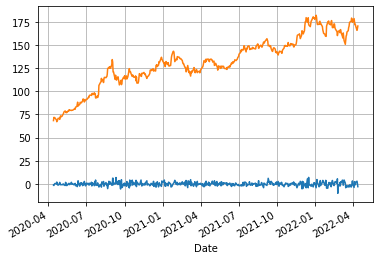

In [46]:
aapl["Diff"].plot(grid=True)
aapl["Close"].plot(grid=True)